In [135]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from PIL import Image
import os, glob
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False

# 이미지 데이터 다운로드
# http://www.vision.caltech.edu/datasets/
# https://drive.google.com/drive/folders/1cnQHqa8BkVx90-6-UojHnbMB0WhksSRc
# caltech-101 다운로드

In [136]:
# 1. 이미지 분류
# caltech_dir = "11.deep/d0726/image/101_ObjectCategories"
caltech_dir = "image/101_ObjectCategories"
categories = ["chair","camera","butterfly","elephant","flamingo"]
nb_classes = len(categories)
print(nb_classes) # 5

5


In [137]:
# # 2. 이미지 크기 지정
image_w = 64 
image_h = 64
# pixels = image_w * image_h * 3
# print(pixels) # 12288

In [138]:
for j in range(5):
    re1 = [0 for i in range(5)]
re1    

[0, 0, 0, 0, 0]

In [139]:
# 3. 이미지 읽어오기
X = []
Y = []
count=0
for idx, cat in enumerate(categories): # 5개 "chair","camera","butterfly","elephant","flamingo"
    # 레이블 지정 원핫인코딩
    # label = [0 for i in range(nb_classes)]
    # # [1,0,0,0,0],[0,1,0,0,0]
    # label[idx] = 1
    # print(label)
    
    # label[idx] = count
    # 이미지 현재위치 : "11.deep/d0726/image/101_ObjectCategories" 
    # cat : 5개 "chair","camera","butterfly","elephant","flamingo"
    image_dir = caltech_dir + "/" + cat
    # glob: 모든.jpg파일이름 리턴
    files = glob.glob(image_dir+"/*.jpg")
    for i, f in enumerate(files):
        img = Image.open(f) # --- (※6)
        img = img.convert("L")
        # img = img.convert("RGB")
        img = img.resize((image_w, image_h)) #(64,64)
        data = np.asarray(img)
        # 0,1,2,3,4
        label = count
        X.append(data)
        Y.append(label)
        if i % 10 == 0:
            print(i, "\n", data)
    count += 1        
X = np.array(X)
Y = np.array(Y)
print(Y)


0 
 [[253 255 255 ... 255 255 255]
 [253 237 227 ... 255 255 255]
 [247 150 127 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
10 
 [[193 193 193 ... 184 181 180]
 [193 193 193 ... 187 184 182]
 [191 191 191 ... 187 184 182]
 ...
 [222 221 219 ... 249 249 249]
 [226 225 223 ... 251 251 251]
 [223 222 222 ... 251 251 251]]
20 
 [[157 161 157 ... 127 131 142]
 [148 150 153 ... 147 147 146]
 [153 153 152 ... 151 152 150]
 ...
 [151 143 124 ... 128 151 150]
 [150 149 147 ... 145 151 154]
 [159 150 157 ... 154 155 156]]
30 
 [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
40 
 [[148 149 149 ...  27  27  39]
 [151 151 149 ...  23  37  98]
 [139 132 126 ...  23  67 114]
 ...
 [ 85  80  87 ...  86  97  97]
 [ 78  81  85 ...  74  86  96]
 [ 87  87  78 ...  95  68  82]]
50 
 [[28 28 31 

In [140]:
# train_data,test_data로 numpy파일로 저장
X_train, X_test, y_train, y_test = train_test_split(X, Y)
xy = (X_train, X_test, y_train, y_test)
np.save("./image/5obj.npy", xy)
print("ok,", len(Y))

ok, 334


c:\Python310\lib\site-packages\numpy\lib\npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [141]:
X.shape

(334, 64, 64)

In [142]:
Y.shape

(334,)

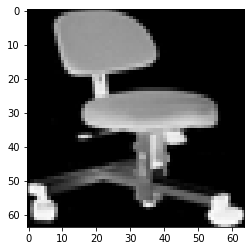

In [143]:
plt.imshow(X[1], cmap='gray_r')
plt.show()

이미지 변환 후 numpy저장

이후 딥러닝 적용


In [144]:
# # 데이터 불러오기 
# # np.load시 allow_pickle=True해야 함.
# X_train, X_test, y_train, y_test = np.load("image/5obj.npy", allow_pickle=True)
# X_train.shape


In [145]:
# 3차원 데이터 변환
X_train = X_train.reshape(-1,64,64,1)
X_test = X_test.reshape(-1,64,64,1)
print(X_train.shape)
X_test.shape

(250, 64, 64, 1)


(84, 64, 64, 1)

In [146]:
# 데이터 정규화하기
X_train = X_train.astype("float") / 255
X_test  = X_test.astype("float")  / 255
X_test.shape

(84, 64, 64, 1)

In [147]:
print('X_train shape:', X_train.shape)

X_train shape: (250, 64, 64, 1)


In [148]:
X_train.shape[1:]

(64, 64, 1)

In [149]:
# 합성곱 신경망 선언
model = keras.Sequential()

# CNN
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(64, 64, 1)))
# 최대풀링
model.add(keras.layers.MaxPooling2D(2))

# CNN - 1회 반복
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'))
# 최대풀링
model.add(keras.layers.MaxPooling2D(2))



In [150]:
# 인공신경망의 선언
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 16384)             0         
                                                                 
 dense_16 (Dense)            (None, 100)              

In [151]:
model.compile(loss='sparse_categorical_crossentropy',
    optimizer='rmsprop',
    metrics='accuracy')
# model.compile(loss='binary_crossentropy',
#     optimizer='rmsprop',
#     metrics=['accuracy'])

In [152]:
# 순환 신경망 설정 adam
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [163]:
# 콜백 - 20번돌고, 가장 낮은 손실률을 저장
check_cb = keras.callbacks.ModelCheckpoint('cnn-test.h5',save_best_only=True)
early_cb = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

In [165]:
history = model.fit(X_train,y_train,epochs=100,batch_size=64,\
    validation_data=(X_test,y_test),callbacks=[check_cb,early_cb])

Epoch 1/100
4/4 [==============================] - 1s 136ms/step - loss: 0.8528 - accuracy: 0.7720 - val_loss: 1.0494 - val_accuracy: 0.6190
Epoch 2/100
4/4 [==============================] - 0s 112ms/step - loss: 0.8481 - accuracy: 0.7160 - val_loss: 1.0390 - val_accuracy: 0.6310
Epoch 3/100
4/4 [==============================] - 0s 124ms/step - loss: 0.8205 - accuracy: 0.7600 - val_loss: 0.9940 - val_accuracy: 0.6071
Epoch 4/100
4/4 [==============================] - 0s 123ms/step - loss: 0.7885 - accuracy: 0.7680 - val_loss: 0.9716 - val_accuracy: 0.7024
Epoch 5/100
4/4 [==============================] - 0s 121ms/step - loss: 0.8056 - accuracy: 0.7320 - val_loss: 0.9667 - val_accuracy: 0.6786
Epoch 6/100
4/4 [==============================] - 0s 112ms/step - loss: 0.7834 - accuracy: 0.7720 - val_loss: 0.9763 - val_accuracy: 0.6548
Epoch 7/100
4/4 [==============================] - 0s 122ms/step - loss: 0.8346 - accuracy: 0.7280 - val_loss: 0.9469 - val_accuracy: 0.7143
Epoch 8/100
4

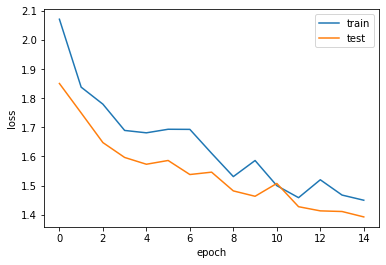

In [155]:
# 그래프 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

In [161]:
# 정확도
score = model.evaluate(X_test,y_test)
print("loss, accuracy : ",score)

3/3 [==============================] - 0s 11ms/step - loss: 1.3926 - accuracy: 0.5000
loss, accuracy :  [1.3926373720169067, 0.5]
